In [93]:
# Importing modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
# Used to change filepaths
from pathlib import Path

## NAÏVE BEES: IMAGE LOADING AND PROCESSING

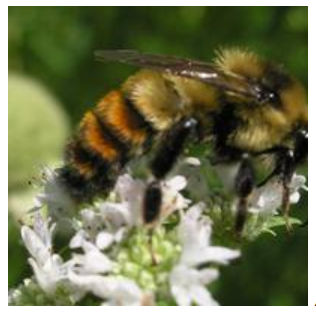

In [94]:
img = Image.open('Honey Bee.png')
img

In [95]:
print("The image size is: {}".format(img.size))

The image size is: (316, 312)


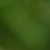

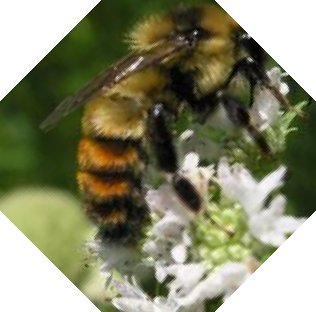

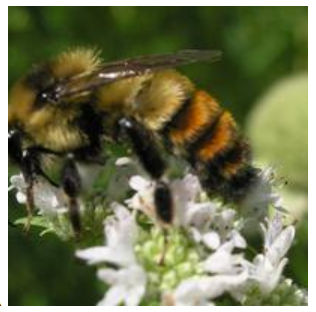

In [96]:
#trying different operations that pillow provides:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop([25,25,75,75])
display(img_cropped)
# rotate the image by 45 degrees
img_rotated = img.rotate(45)
display(img_rotated)
# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

In [97]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape=img_data.shape
print("Our NumPy array has the shape: {}".format(img_data_shape))

Our NumPy array has the shape: (312, 316, 4)


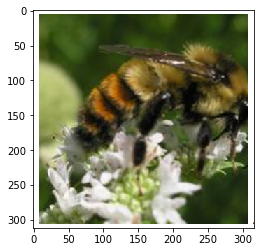

In [98]:
# plot the data with `imshow` 
plt.imshow(img_data)
plt.show()

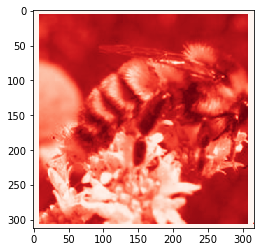

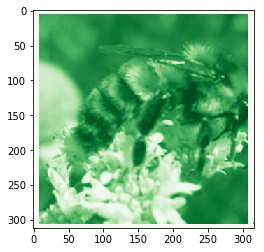

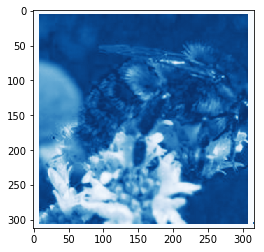

In [99]:
# plot the red channel
plt.imshow(img_data[:, :, 0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:, :, 1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:, :, 2], cmap=plt.cm.Blues_r)
plt.show()


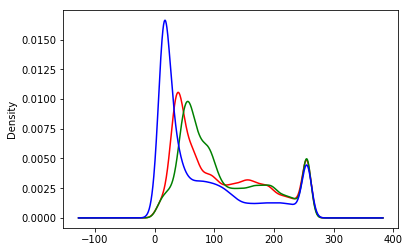

In [100]:
##Explore the color channels
def plot_kde(channel, color):
    # Plots a kernel density estimate for the given data.
    
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(img_data[:, :, ix], color)

    plt.show()
    
plot_rgb(img_data)

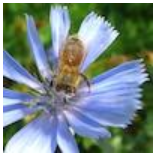

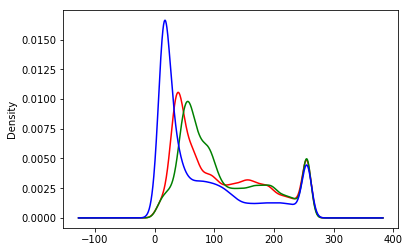

In [101]:
#Honey bees and bumble bees Analysis
#Honey Bee
honey = Image.open('honeybee1.png')

# display the honey bee image
display(honey)

# NumPy array of the honey bee image data
honey_data = np.array(honey)

# plot the rgb densities for the bumble bee image
plot_rgb(honey_data)

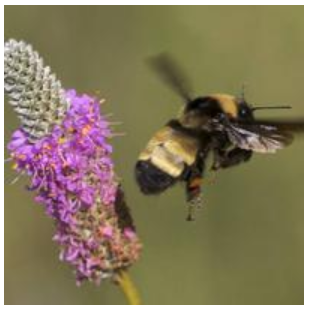

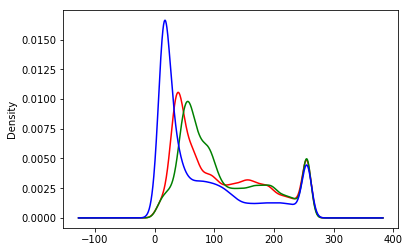

In [102]:
# Bumble Bee
bumble = Image.open('Bumble Bee.png')

# display the bumble bee image
display(bumble)

# NumPy array of the bumble bee image data
bumble_data = np.array(bumble)

# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

### We know that the colors of the flowers may be distracting from separating honey bees from bumble bees, so let's convert these images to black-and-white, or "grayscale."

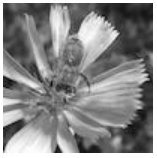

Our NumPy array has the shape: (158, 157)


In [103]:
# convert honey to grayscale
honey_bw = honey.convert("L")
display(honey_bw)
# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw )
# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

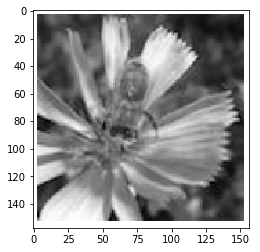

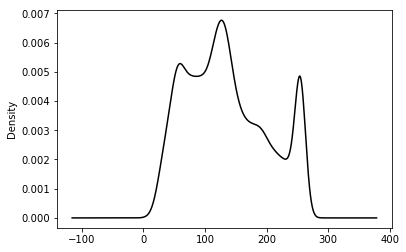

In [104]:
# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()
# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

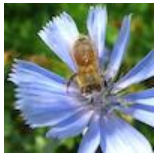

In [105]:
# Saving the work for future use 
# flip the image left-right with transpose
honey_bw_flip = honey.transpose(Image.FLIP_LEFT_RIGHT)
# show the flipped image
display(honey_bw_flip)

# save the flipped image
honey_bw_flip.save("bw_flip.png")

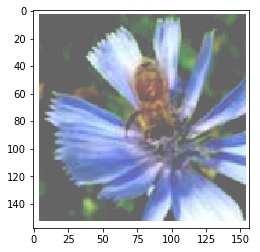

In [106]:
# create higher contrast by reducing range
honey_hc_arr = np.maximum(100,np.array (honey_bw_flip))

# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image
honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version
honey_bw_hc.save("bw_hc.png")